In [11]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# 1枚で動作確認

In [3]:
img_dir = "img"
img_name = os.listdir(img_dir)
print(img_name)

['IMG_0153.JPG', 'IMG_0154.JPG', 'IMG_0155.JPG', 'IMG_0156.JPG', 'IMG_0157.JPG', 'IMG_0158.JPG', 'IMG_0159.JPG', 'IMG_0160.JPG', 'IMG_0161.JPG', 'IMG_0162.JPG', 'IMG_0163.JPG', 'IMG_0164.JPG', 'IMG_0165.JPG', 'IMG_0166.JPG', 'IMG_0167.JPG', 'IMG_0168.JPG', 'IMG_0169.JPG', 'IMG_0170.JPG', 'IMG_0171.JPG', 'IMG_0172.JPG', 'IMG_0173.JPG', 'IMG_0174.JPG', 'IMG_0175.JPG', 'IMG_0176.JPG', 'IMG_0197.JPG', 'IMG_0198.JPG', 'IMG_0199.JPG', 'IMG_0200.JPG', 'IMG_0201.JPG', 'IMG_0202.JPG', 'IMG_0203.JPG', 'IMG_0204.JPG', 'IMG_0205.JPG', 'IMG_0206.JPG', 'IMG_0207.JPG', 'IMG_0208.JPG', 'IMG_0209.JPG', 'IMG_0211.JPG', 'IMG_0212.JPG', 'IMG_0213.JPG', 'IMG_0214.JPG', 'IMG_0215.JPG', 'IMG_3802.JPG', 'IMG_3803.JPG', 'IMG_3804.JPG', 'IMG_3805.JPG', 'IMG_3806.JPG', 'IMG_3807.JPG', 'IMG_3808.JPG', 'IMG_3809.JPG', 'IMG_3810.JPG', 'IMG_3811.JPG', 'IMG_3812.JPG', 'IMG_3813.JPG', 'IMG_3814.JPG', 'IMG_3815.JPG', 'IMG_3816.JPG', 'IMG_3817.JPG', 'IMG_3818.JPG', 'IMG_3819.JPG', 'IMG_3820.JPG', 'IMG_3821.JPG', 'IMG_38

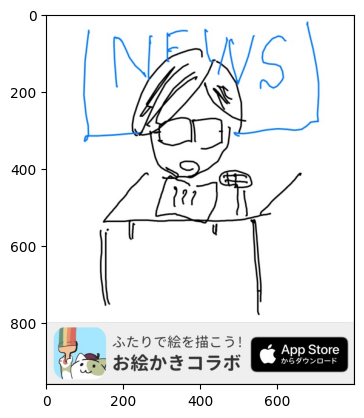

In [7]:
img_path = os.path.join(img_dir, img_name[0])

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

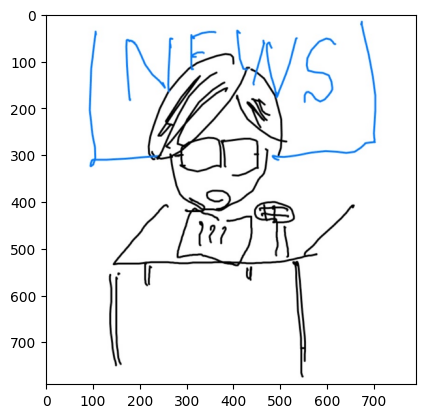

In [145]:
# 下の広告邪魔なので除去
img_rgb_tri = img_rgb[5:795, 5:795]
plt.imshow(img_rgb_tri)

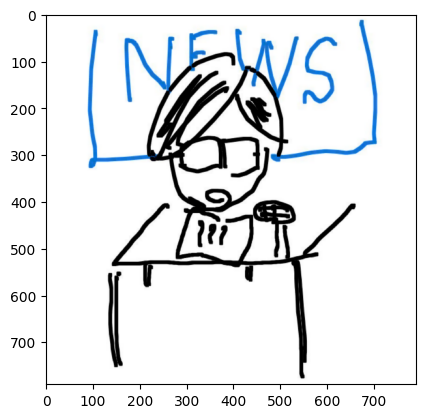

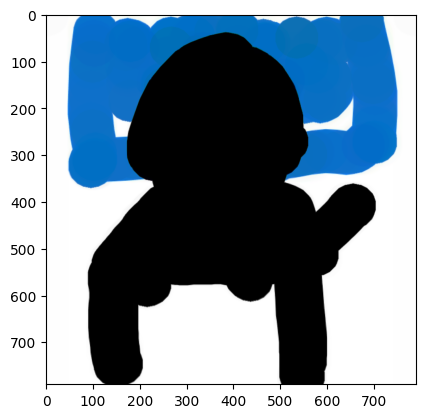

In [179]:
# 線を太くする
kernel = np.ones((5, 5), np.uint8)
img_rgb_tri_ero = cv2.erode(img_rgb_tri, kernel, iterations=1)
kernel_size=31
kernel_shape = cv2.MORPH_ELLIPSE  # 丸い形状のカーネル
kernel_2 = cv2.getStructuringElement(kernel_shape, (kernel_size, kernel_size))
#kernel = np.ones((31, 31), np.uint8)
img_rgb_tri_ero_mask = cv2.erode(img_rgb_tri, kernel_2, iterations=3)
plt.imshow(img_rgb_tri_ero)
plt.show()
plt.imshow(img_rgb_tri_ero_mask)
plt.show()

In [180]:
# 背景を決める処理
"""
一旦2値化
1行ずつ見ていって
全部白なら全部透明化
左右それぞれから透明化していって白以外にぶつかったら終了
"""

'\n一旦2値化\n1行ずつ見ていって\n全部白なら全部透明化\n左右それぞれから透明化していって白以外にぶつかったら終了\n'

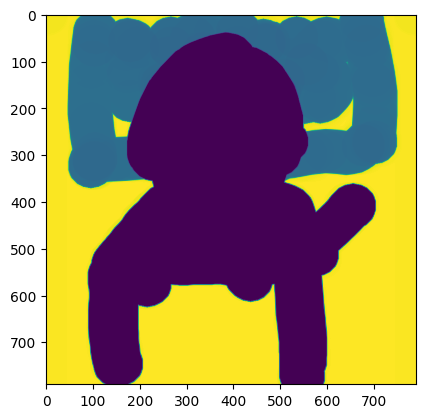

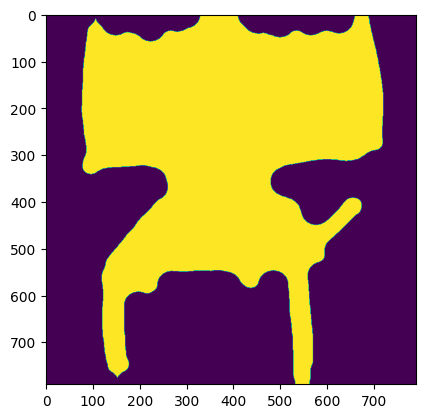

In [181]:
# グレースケール
img_rgb_tri_ero_gray = cv2.cvtColor(img_rgb_tri_ero_mask, cv2.COLOR_RGB2GRAY)
plt.imshow(img_rgb_tri_ero_gray)
plt.show()
# 2値化(これだけでマスク画像になる？) グレー線が弱いので1で2値化するようにする
#ret, mask = cv2.threshold(img_rgb_tri_ero_gray, 0, 256, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, mask = cv2.threshold(img_rgb_tri_ero_gray, 190, 255, cv2.THRESH_BINARY)
#plt.imshow(mask)
# 白黒反転
mask_bitwise = cv2.bitwise_not(mask)
#plt.imshow(mask_bitwise)
# 穴埋め処理
contours,_ = cv2.findContours(mask_bitwise, 1, 2)
zero_img = np.zeros([mask_bitwise.shape[0], mask_bitwise.shape[1]], dtype="uint8")
for p in contours:
    cv2.fillPoly(zero_img, [p], (255, 255, 255))
# 若干収縮してサイズ戻す
kernel_size=31
kernel_shape = cv2.MORPH_ELLIPSE  # 丸い形状のカーネル
kernel = cv2.getStructuringElement(kernel_shape, (kernel_size, kernel_size))
zero_img = cv2.erode(zero_img, kernel, iterations=2)

plt.imshow(zero_img)

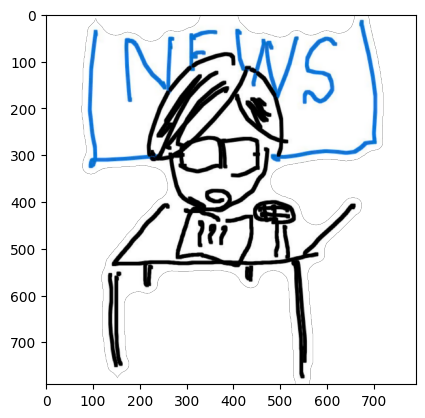

In [182]:
new_img = img_rgb_tri_ero.copy()
new_img_rgba = cv2.cvtColor(new_img, cv2.COLOR_RGB2RGBA)
new_img_rgba[zero_img==0] = [0,0,0,0]
plt.imshow(new_img_rgba)

In [152]:
# 保存
new_img_bgra = cv2.cvtColor(new_img_rgba, cv2.COLOR_RGBA2BGRA)

cv2.imwrite("dst.png", new_img_bgra)

True

# 一括処理

In [117]:
img_dir = "img"
img_names = os.listdir(img_dir)
len(img_names)

63

In [204]:
def stamp(img_name):
    img_path = os.path.join(img_dir, img_name)
    
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 下の広告邪魔なので除去
    img_rgb_tri = img_rgb[5:795, 5:795]

    # 線を太くする
    kernel = np.ones((5, 5), np.uint8)
    img_rgb_tri_ero = cv2.erode(img_rgb_tri, kernel, iterations=1)
    kernel_size=31
    kernel_shape = cv2.MORPH_ELLIPSE  # 丸い形状のカーネル
    kernel_2 = cv2.getStructuringElement(kernel_shape, (kernel_size, kernel_size))
    img_rgb_tri_ero_mask = cv2.erode(img_rgb_tri, kernel_2, iterations=3)

    # グレースケール
    img_rgb_tri_ero_gray = cv2.cvtColor(img_rgb_tri_ero_mask, cv2.COLOR_RGB2GRAY)
    #plt.imshow(img_rgb_tri_ero_gray)
    # 2値化(これだけでマスク画像になる？)
#    ret, mask = cv2.threshold(img_rgb_tri_ero_gray, 0, 256, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    ret, mask = cv2.threshold(img_rgb_tri_ero_gray, 220, 255, cv2.THRESH_BINARY)
    #plt.imshow(mask)
    # 白黒反転
    mask_bitwise = cv2.bitwise_not(mask)
    #plt.imshow(mask_bitwise)
    # 穴埋め処理
    contours,_ = cv2.findContours(mask_bitwise, 1, 2)
    zero_img = np.zeros([mask_bitwise.shape[0], mask_bitwise.shape[1]], dtype="uint8")
    for p in contours:
        cv2.fillPoly(zero_img, [p], (255, 255, 255))
    # 若干収縮してサイズ戻す
    kernel_size=31
    kernel_shape = cv2.MORPH_ELLIPSE  # 丸い形状のカーネル
    kernel = cv2.getStructuringElement(kernel_shape, (kernel_size, kernel_size))
    zero_img = cv2.erode(zero_img, kernel, iterations=2)
    
    new_img = img_rgb_tri_ero.copy()
    new_img_rgba = cv2.cvtColor(new_img, cv2.COLOR_RGB2RGBA)
    new_img_rgba[zero_img==0] = [0,0,0,0]
    new_img_2 = img_rgb_tri_ero.copy()
    new_img_2[zero_img==0] = [0,0,0]
    plt.imshow(new_img_rgba)
    plt.show()

    return new_img_rgba, new_img_2

IMG_0153.JPG


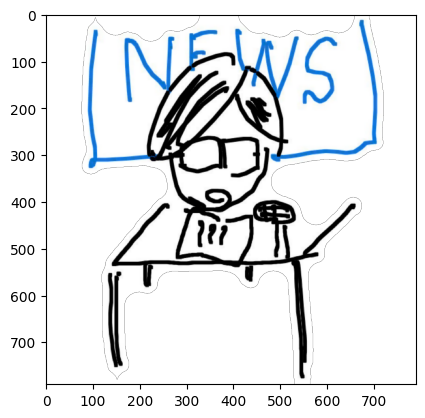

IMG_0154.JPG


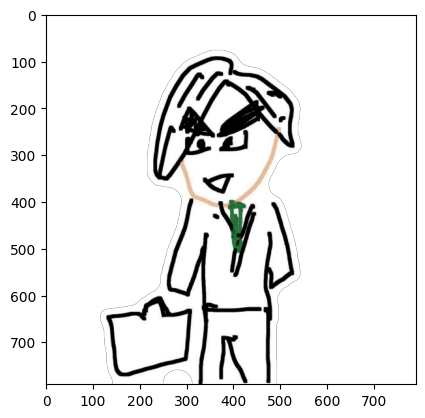

IMG_0155.JPG


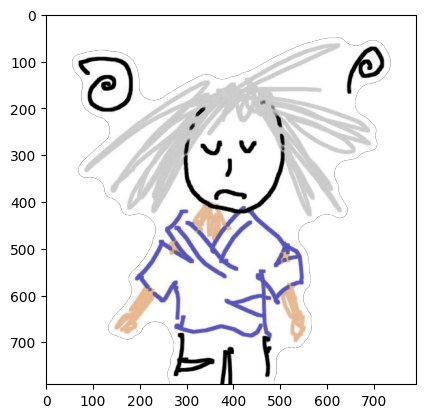

IMG_0156.JPG


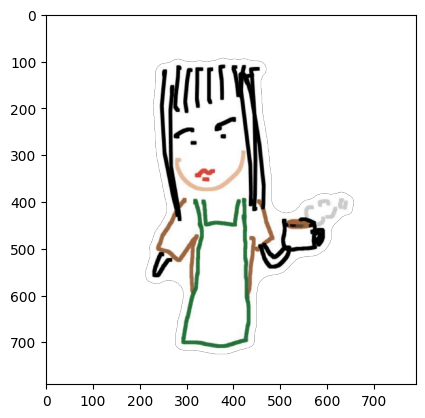

IMG_0157.JPG


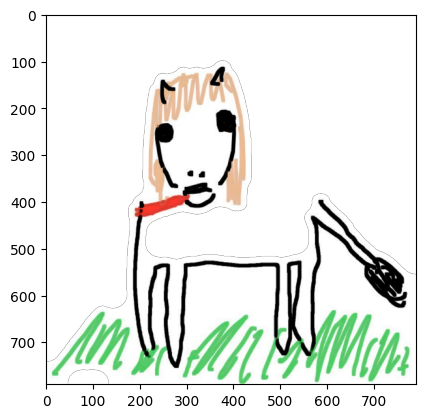

IMG_0158.JPG


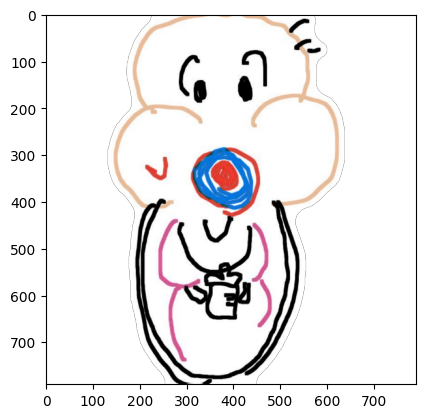

IMG_0159.JPG


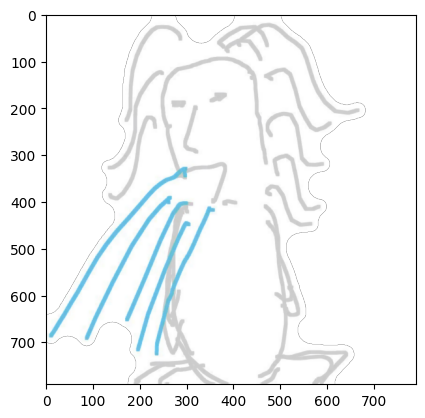

IMG_0160.JPG


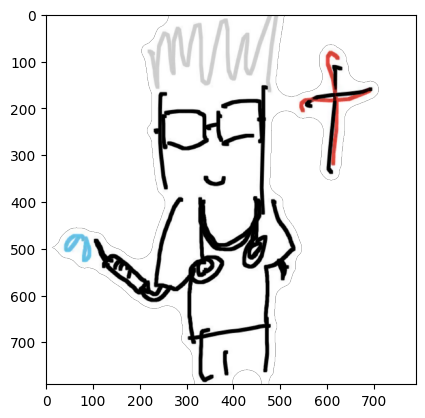

IMG_0161.JPG


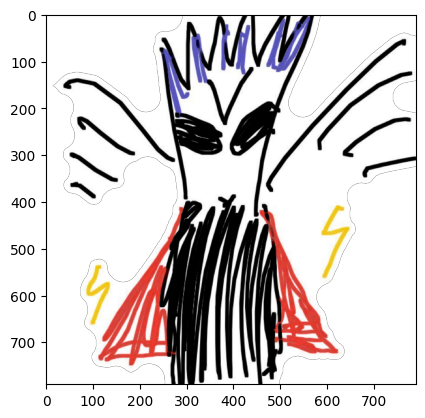

IMG_0162.JPG


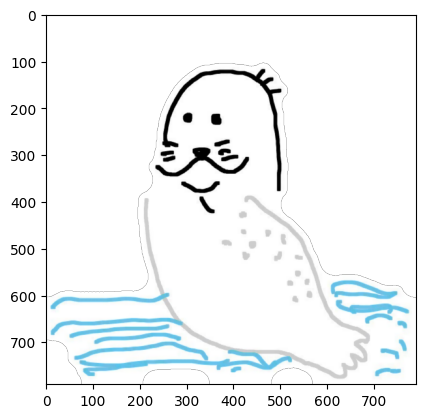

IMG_0163.JPG


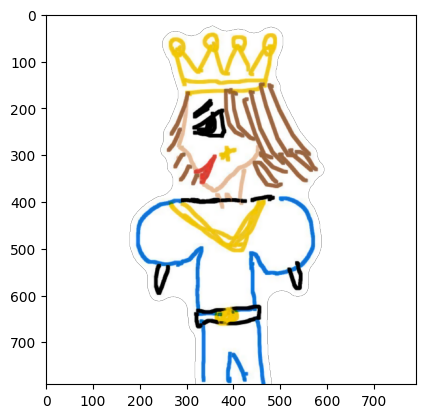

IMG_0164.JPG


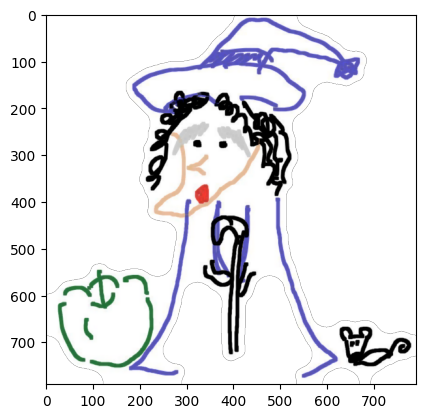

IMG_0165.JPG


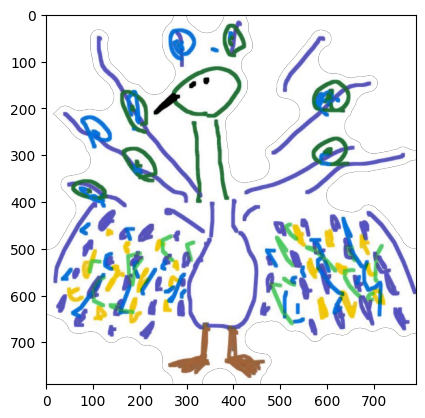

IMG_0166.JPG


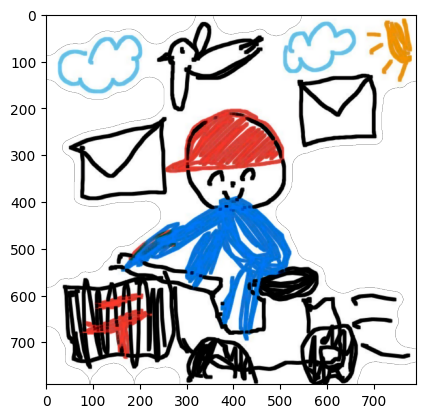

IMG_0167.JPG


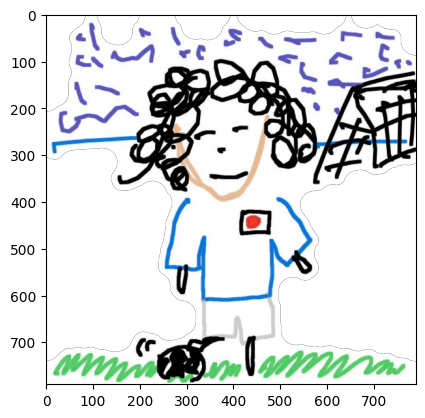

IMG_0168.JPG


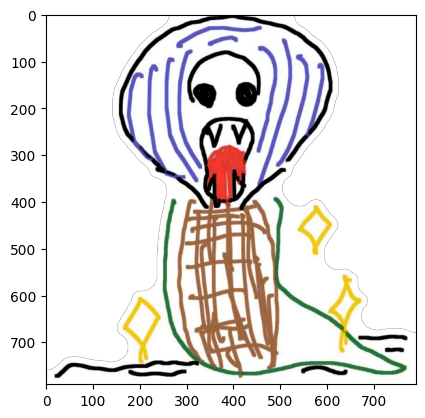

IMG_0169.JPG


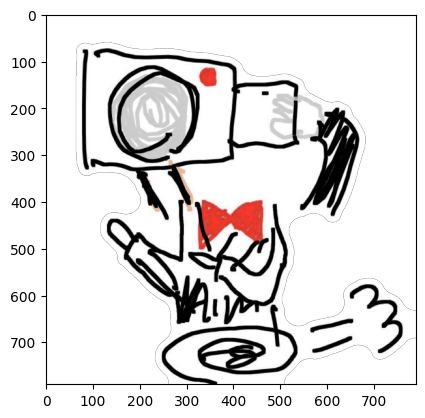

IMG_0170.JPG


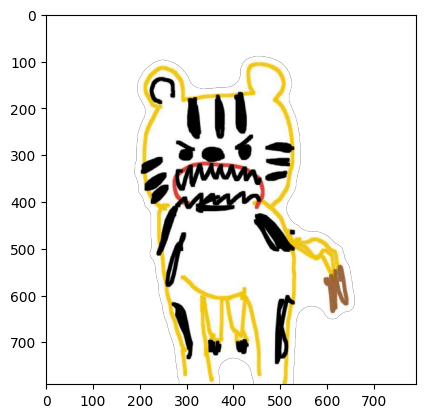

IMG_0171.JPG


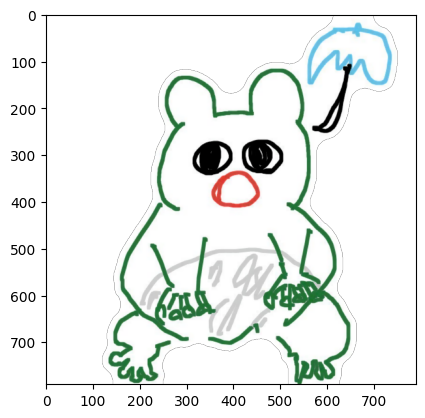

IMG_0172.JPG


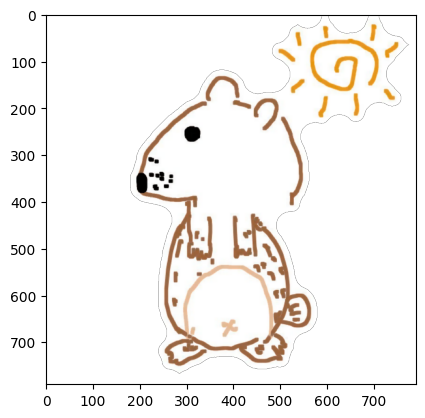

IMG_0173.JPG


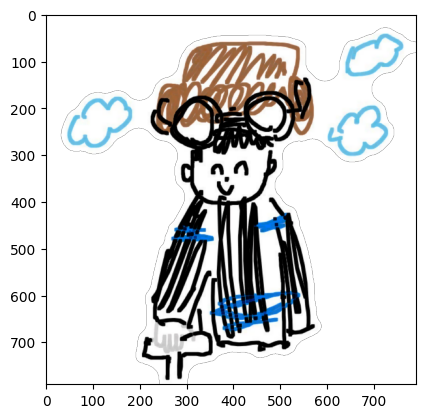

IMG_0174.JPG


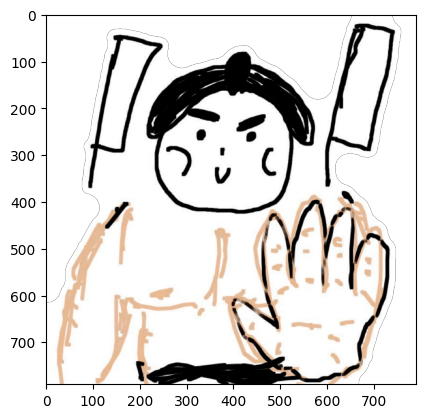

IMG_0175.JPG


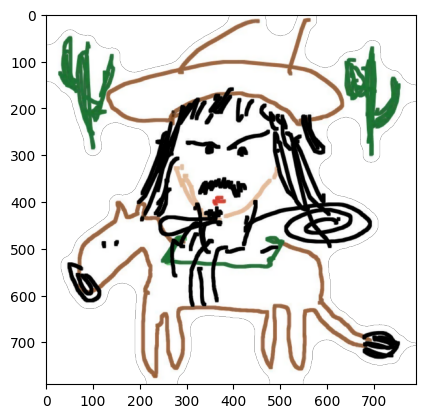

IMG_0176.JPG


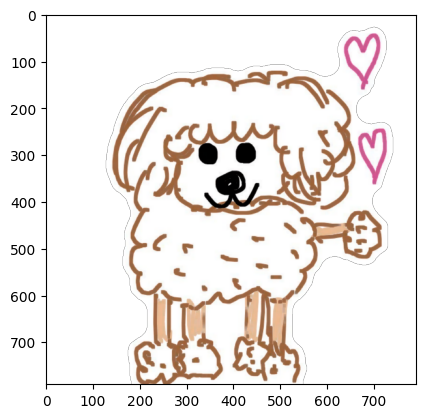

IMG_0197.JPG


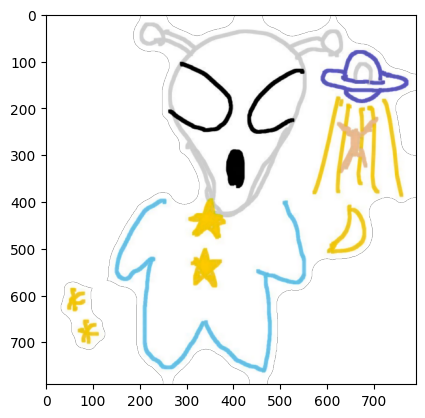

IMG_0198.JPG


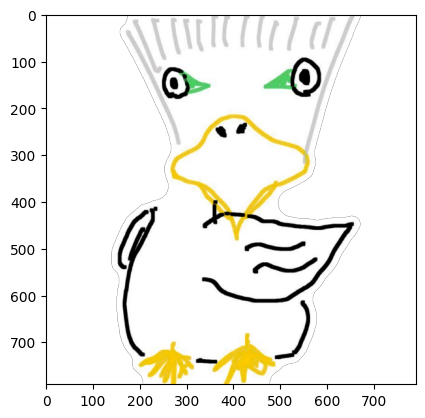

IMG_0199.JPG


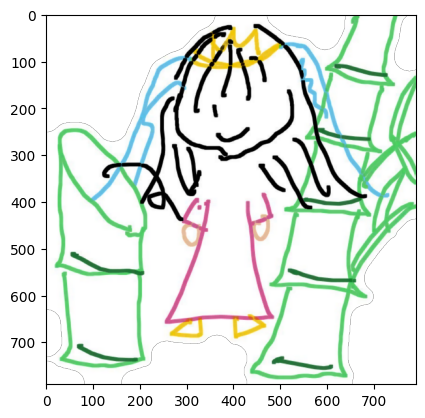

IMG_0200.JPG


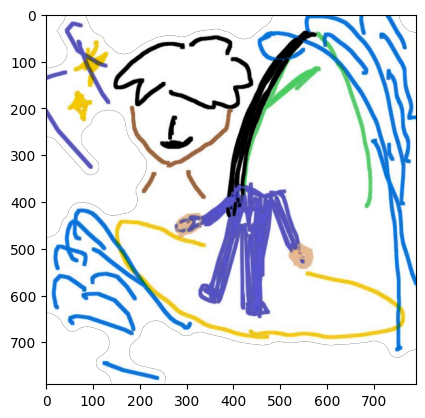

IMG_0201.JPG


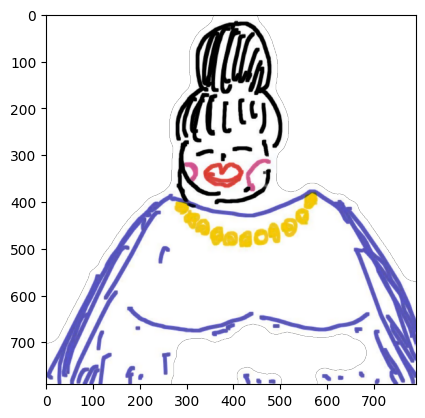

IMG_0202.JPG


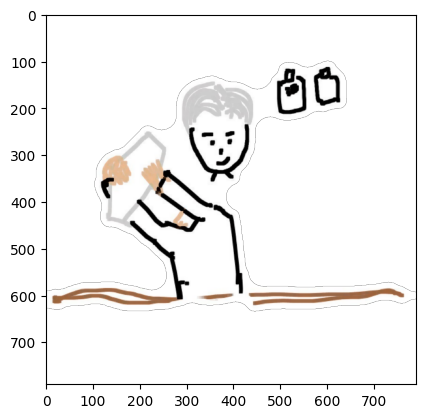

IMG_0203.JPG


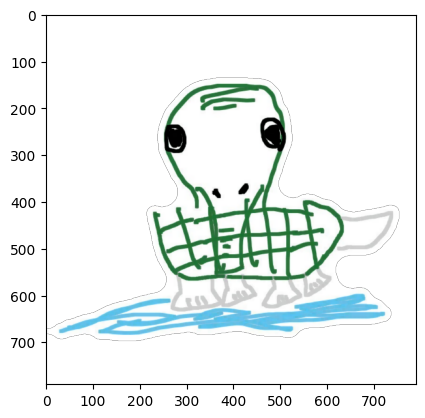

IMG_0204.JPG


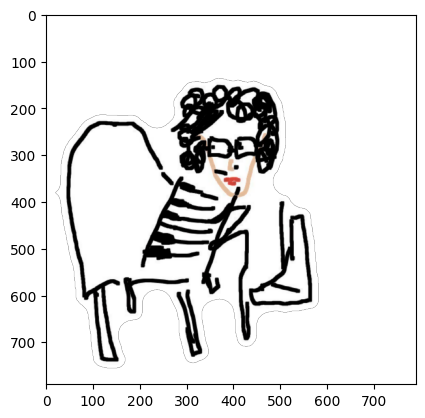

IMG_0205.JPG


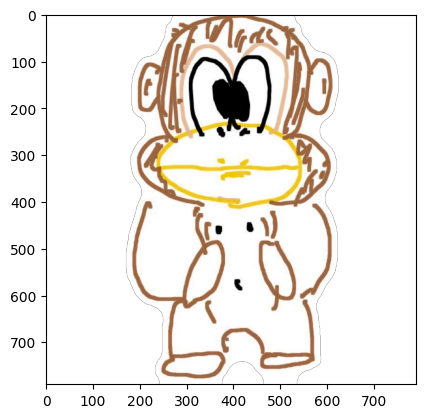

IMG_0206.JPG


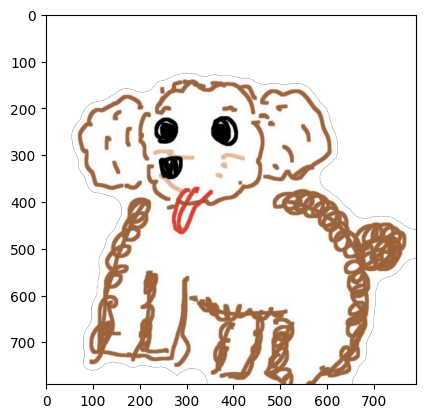

IMG_0207.JPG


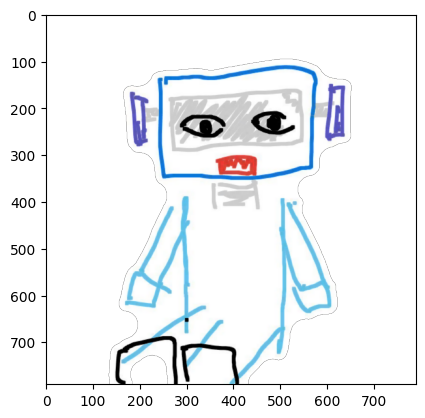

IMG_0208.JPG


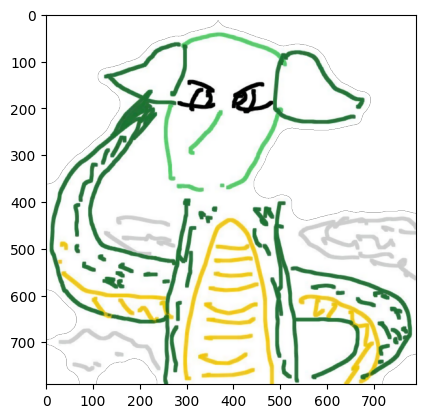

IMG_0209.JPG


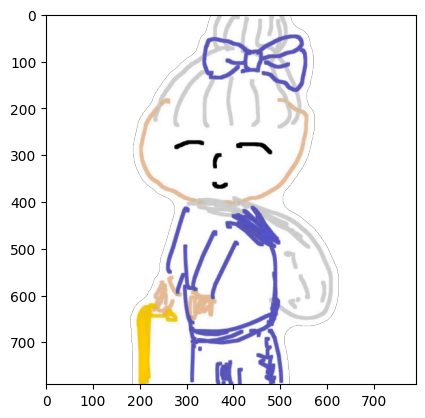

IMG_0211.JPG


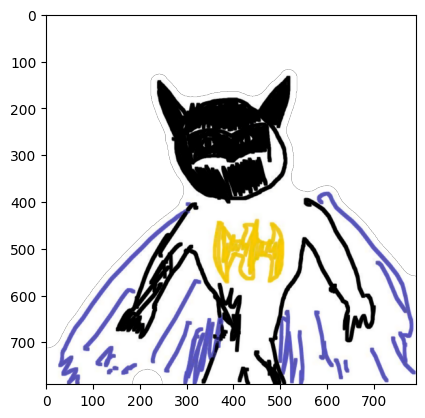

IMG_0212.JPG


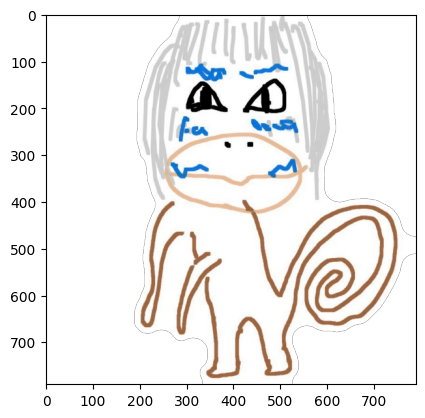

IMG_0213.JPG


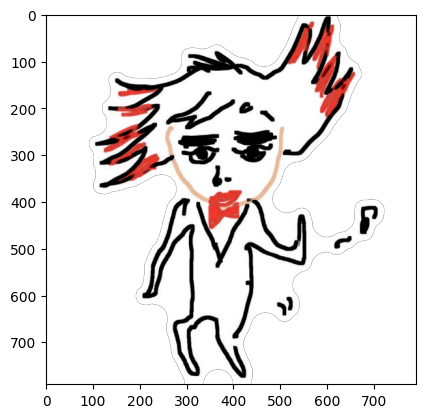

IMG_0214.JPG


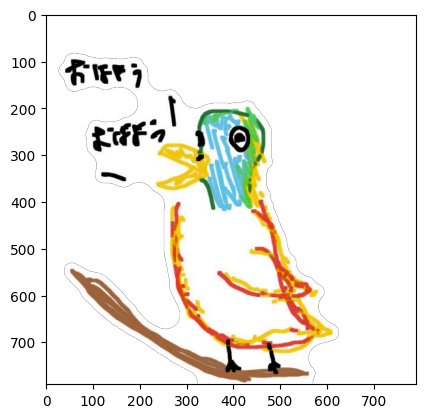

IMG_0215.JPG


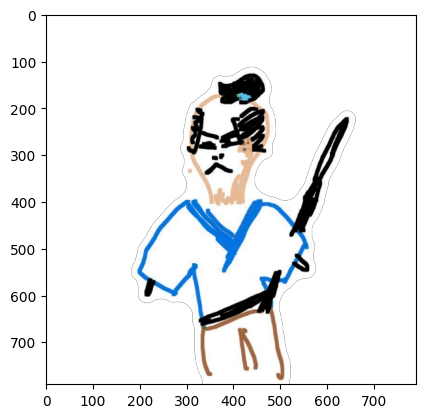

IMG_3802.JPG


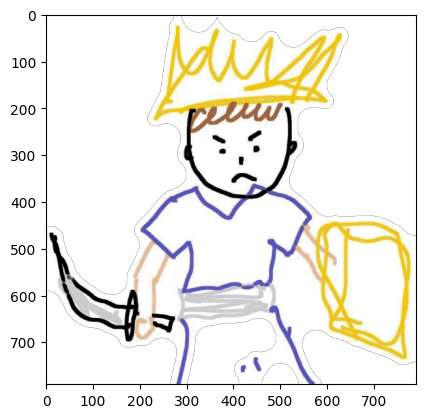

IMG_3803.JPG


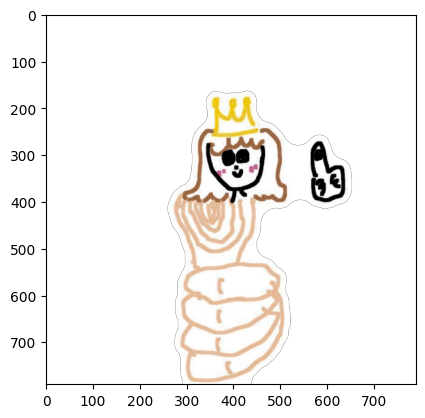

IMG_3804.JPG


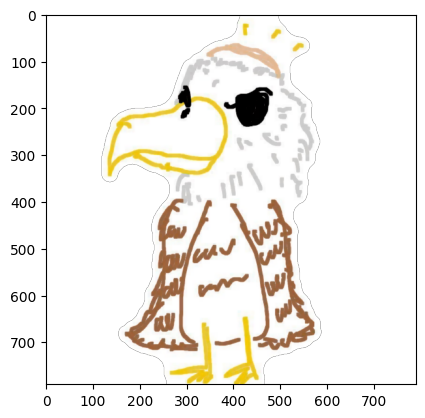

IMG_3805.JPG


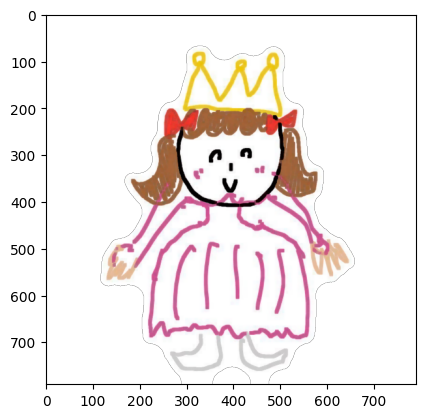

IMG_3806.JPG


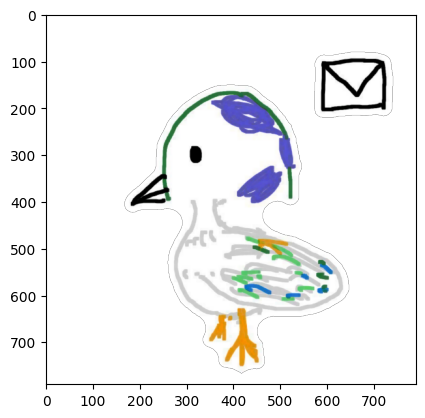

IMG_3807.JPG


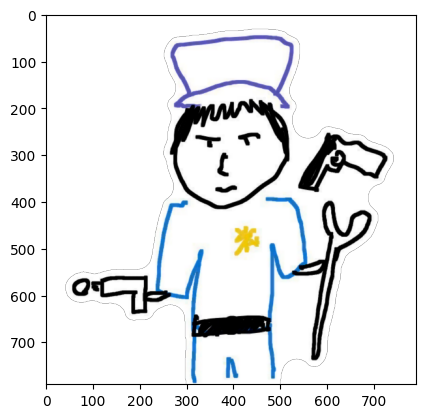

IMG_3808.JPG


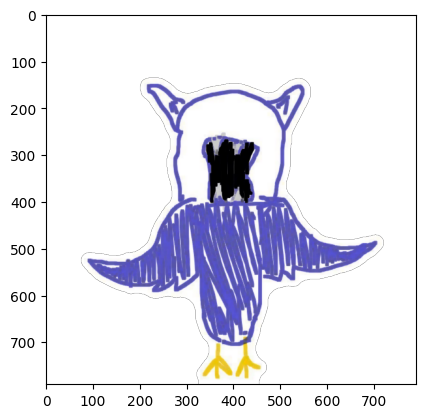

IMG_3809.JPG


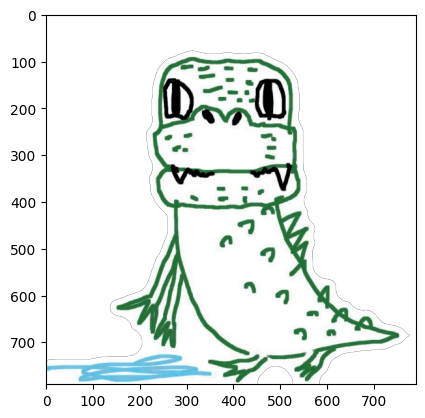

IMG_3810.JPG


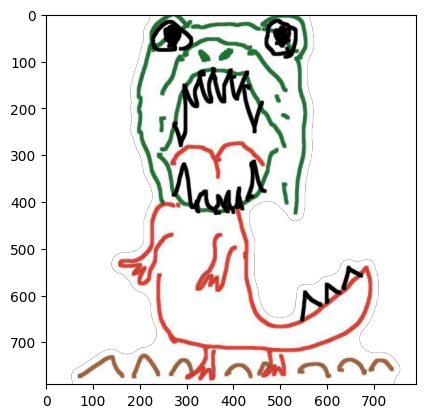

IMG_3811.JPG


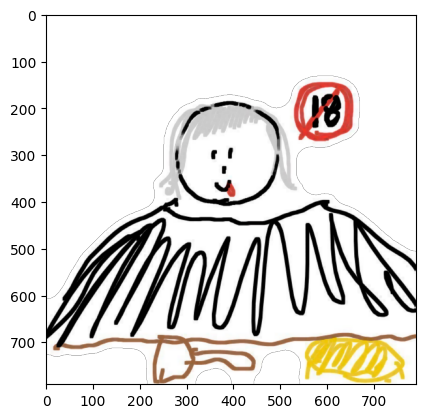

IMG_3812.JPG


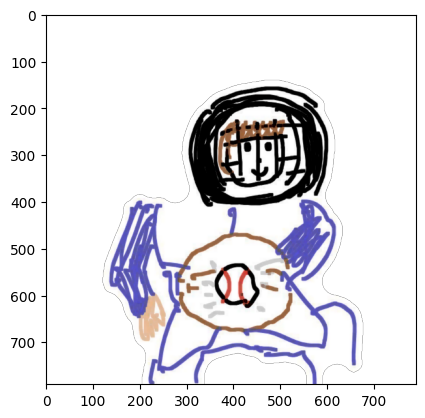

IMG_3813.JPG


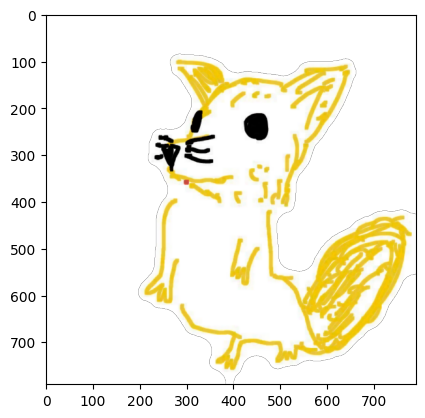

IMG_3814.JPG


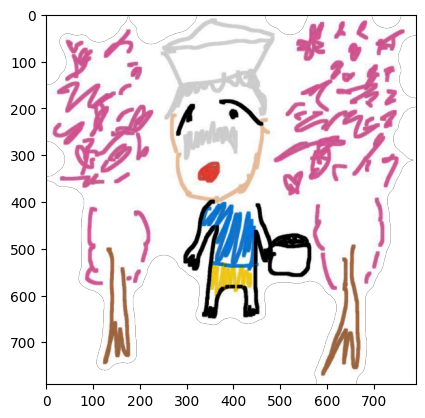

IMG_3815.JPG


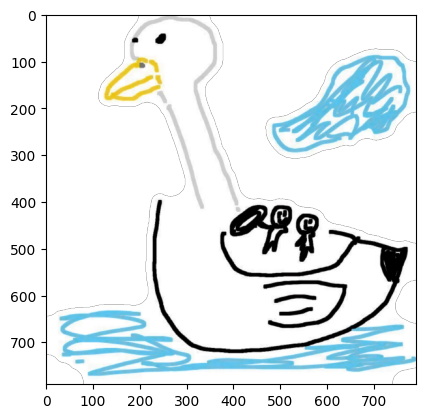

IMG_3816.JPG


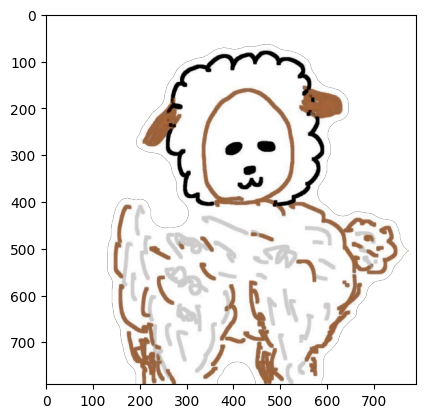

IMG_3817.JPG


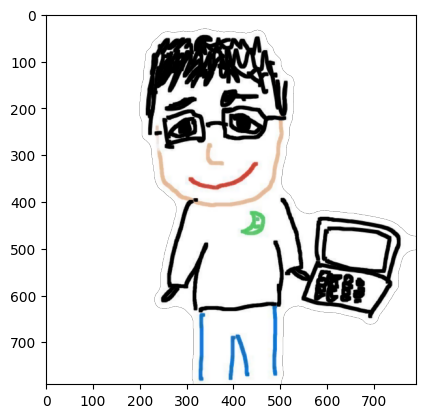

IMG_3818.JPG


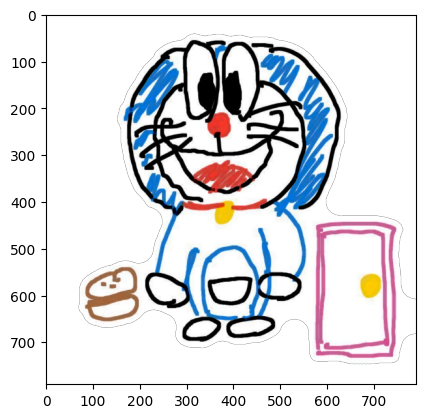

IMG_3819.JPG


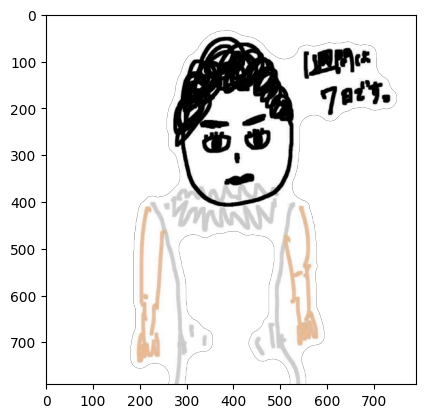

IMG_3820.JPG


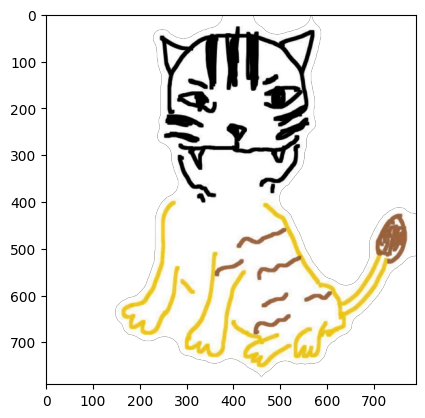

IMG_3821.JPG


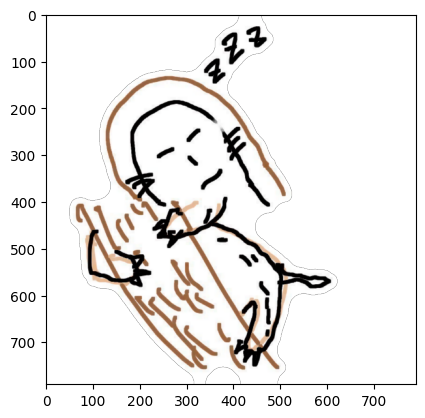

IMG_3822.JPG


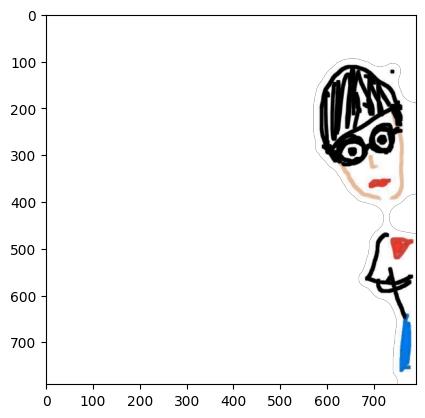

In [207]:
for img_name in img_names:
    print(img_name)
    img_rgba, img_rgb = stamp(img_name)
    new_img_bgra = cv2.cvtColor(img_rgba, cv2.COLOR_RGBA2BGRA)
    new_img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
    cv2.imwrite(img_name[:-4]+".png", new_img_bgra)
    # フォーム用
    cv2.imwrite(os.path.join("form",(img_name[:-4]+".png")), new_img_bgr)